In [294]:
import pandas as pd #used for working with dataframes—our dataset
import numpy as np #used to manipulate arrays
import matplotlib.pyplot as plt #for making visuals
import seaborn as sns #for making visuals too
import json

In [295]:
traina=pd.read_csv(r"C:\Users\melinadiaz\Documents\GitHub\train_trendency.csv")
trainb=pd.read_csv(r"C:\Users\melinadiaz\Documents\GitHub\train_vaccine.csv")
sub=pd.read_csv(r"C:\Users\melinadiaz\Documents\GitHub\Quadratic_Regression.csv") #meaning submission results
traina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3950 non-null   int64  
 1   Province_State       3950 non-null   object 
 2   Date                 3950 non-null   object 
 3   Confirmed            3950 non-null   int64  
 4   Deaths               3950 non-null   int64  
 5   Recovered            2017 non-null   float64
 6   Active               2700 non-null   float64
 7   Incident_Rate        3950 non-null   float64
 8   Total_Test_Results   3950 non-null   float64
 9   Case_Fatality_Ratio  3950 non-null   float64
 10  Testing_Rate         3950 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 308.7+ KB


In [296]:
#standardize datatype and label as Training data
traina["Date"]=pd.to_datetime(traina["Date"])
traina["Test"]="Train"
traina

,Unnamed: 0,Province_State,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Test
0,0,Alabama,2021-01-12,407848,5573,211684.0,190591.0,8318.021857,1981019.0,1.366440,40402.697430,Train
1,1,Alaska,2021-01-12,50544,225,7165.0,43132.0,6906.205360,1357708.0,0.445351,185594.597735,Train
2,2,Arizona,2021-01-12,636100,10482,86757.0,538861.0,8739.177523,5742443.0,1.647854,42806.225328,Train
3,3,Arkansas,2021-01-12,259553,4121,229700.0,25732.0,8600.724235,2208736.0,1.587730,73190.174047,Train
4,4,California,2021-01-12,2832085,31345,NaN,2773506.0,7098.216165,36508384.0,1.110900,92397.696784,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
3945,3945,Virginia,2021-03-31,618976,10252,NaN,NaN,7251.767584,6466133.0,1.656284,75755.592601,Train
3946,3946,Washington,2021-03-31,364486,5247,NaN,NaN,4786.488792,5890924.0,1.439561,77360.561731,Train
3947,3947,West Virginia,2021-03-31,141738,2676,NaN,NaN,7908.837835,2468123.0,1.887991,137718.780881,Train
3948,3948,Wisconsin,2021-03-31,636041,7315,NaN,NaN,10923.970972,7585402.0,1.150083,130278.883367,Train


In [297]:
#standardize datatype and label as our Guess/Submission data
sub["Date"]=pd.to_datetime(sub["Date"])
sub["Date"]=sub["Date"].dt.floor('d')
sub["Test"]="Guess"
sub

,ID,Confirmed,Deaths,Province_State,Date,Test
0,0,5.154129e+05,10548.889440,Alabama,2021-04-01,Guess
1,1,6.301964e+04,312.960373,Alaska,2021-04-01,Guess
2,2,8.407519e+05,16968.302360,Arizona,2021-04-01,Guess
3,3,3.301721e+05,5624.706960,Arkansas,2021-04-01,Guess
4,4,3.664175e+06,59400.976690,California,2021-04-01,Guess
...,...,...,...,...,...,...
1495,1495,6.187950e+05,10746.013110,Virginia,2021-04-30,Guess
1496,1496,3.682524e+05,5275.154377,Washington,2021-04-30,Guess
1497,1497,1.425196e+05,2740.831928,West Virginia,2021-04-30,Guess
1498,1498,6.367166e+05,7291.273827,Wisconsin,2021-04-30,Guess


In [298]:
alla=traina.append(sub) #merging training data with submission data, removing unnecessary columns
states=alla["Province_State"].unique()
alla=alla.drop(columns=['Recovered', 'Active', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'ID'])
print(alla["Province_State"].unique())
alla
#We now got to filter by each state, there was probably an easier way to do this, but I just manually did it

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


,Unnamed: 0,Province_State,Date,Confirmed,Deaths,Test
0,0.0,Alabama,2021-01-12,4.078480e+05,5573.000000,Train
1,1.0,Alaska,2021-01-12,5.054400e+04,225.000000,Train
2,2.0,Arizona,2021-01-12,6.361000e+05,10482.000000,Train
3,3.0,Arkansas,2021-01-12,2.595530e+05,4121.000000,Train
4,4.0,California,2021-01-12,2.832085e+06,31345.000000,Train
...,...,...,...,...,...,...
1495,NaN,Virginia,2021-04-30,6.187950e+05,10746.013110,Guess
1496,NaN,Washington,2021-04-30,3.682524e+05,5275.154377,Guess
1497,NaN,West Virginia,2021-04-30,1.425196e+05,2740.831928,Guess
1498,NaN,Wisconsin,2021-04-30,6.367166e+05,7291.273827,Guess


In [299]:
Wyoming=alla[alla["Province_State"]=="Wyoming"]


In [300]:
Wisconsin=alla[alla["Province_State"]=="Wisconsin"]


In [301]:
West_Virginia=alla[alla["Province_State"]=="West Virginia"]


In [302]:
Washington=alla[alla["Province_State"]=="Washington"]


In [303]:
Virginia=alla[alla["Province_State"]=="Virginia"]


In [304]:
Vermont=alla[alla["Province_State"]=="Vermont"]


In [305]:
Utah=alla[alla["Province_State"]=="Utah"]


In [306]:
Texas=alla[alla["Province_State"]=="Texas"]


In [307]:
Tennessee=alla[alla["Province_State"]=="Tennessee"]


In [308]:
South_Dakota=alla[alla["Province_State"]=="South Dakota"]


In [309]:
South_Carolina=alla[alla["Province_State"]=="South Carolina"]


In [310]:
Rhode_Island=alla[alla["Province_State"]=="Rhode Island"]


In [311]:
Pennsylvania=alla[alla["Province_State"]=="Pennsylvania"]


In [312]:
Oregon=alla[alla["Province_State"]=="Oregon"]


In [313]:
Oklahoma=alla[alla["Province_State"]=="Oklahoma"]


In [314]:
Ohio=alla[alla["Province_State"]=="Ohio"]


In [315]:
North_Dakota=alla[alla["Province_State"]=="North Dakota"]


In [316]:
North_Carolina=alla[alla["Province_State"]=="North Carolina"]


In [317]:
New_York=alla[alla["Province_State"]=="New York"]


In [318]:
New_Mexico=alla[alla["Province_State"]=="New Mexico"]


In [319]:
New_Jersey=alla[alla["Province_State"]=="New Jersey"]


In [320]:
New_Hampshire=alla[alla["Province_State"]=="New Hampshire"]


In [321]:
Nevada=alla[alla["Province_State"]=="Nevada"]


In [322]:
Nebraska=alla[alla["Province_State"]=="Nebraska"]


In [323]:
Montana=alla[alla["Province_State"]=="Montana"]


In [324]:
Missouri=alla[alla["Province_State"]=="Missouri"]


In [325]:
Mississippi=alla[alla["Province_State"]=="Mississippi"]


In [326]:
Minnesota=alla[alla["Province_State"]=="Minnesota"]


In [327]:
Michigan=alla[alla["Province_State"]=="Michigan"]


In [328]:
Massachusetts=alla[alla["Province_State"]=="Massachusetts"]


In [329]:
Maryland=alla[alla["Province_State"]=="Maryland"]


In [330]:
Maine=alla[alla["Province_State"]=="Maine"]


In [331]:
Louisiana=alla[alla["Province_State"]=="Louisiana"]


In [332]:
Kentucky=alla[alla["Province_State"]=="Kentucky"]


In [333]:
Kansas=alla[alla["Province_State"]=="Kansas"]


In [334]:
Iowa=alla[alla["Province_State"]=="Iowa"]


In [335]:
Indiana=alla[alla["Province_State"]=="Indiana"]


In [336]:
Illinois=alla[alla["Province_State"]=="Illinois"]


In [337]:
Idaho=alla[alla["Province_State"]=="Idaho"]


In [338]:
Hawaii=alla[alla["Province_State"]=="Hawaii"]


In [339]:
Georgia=alla[alla["Province_State"]=="Georgia"]


In [340]:
Florida=alla[alla["Province_State"]=="Florida"]


In [341]:
Delaware=alla[alla["Province_State"]=="Delaware"]


In [342]:
Connecticut=alla[alla["Province_State"]=="Connecticut"]


In [343]:
Colorado=alla[alla["Province_State"]=="Colorado"]


In [344]:
California=alla[alla["Province_State"]=="California"]


In [345]:
Arkansas=alla[alla["Province_State"]=="Arkansas"]


In [346]:
Arizona=alla[alla["Province_State"]=="Arizona"]


In [347]:
Alaska=alla[alla["Province_State"]=="Alaska"]


In [348]:
Alabama=alla[alla["Province_State"]=="Alabama"]
Alabama

,Unnamed: 0,Province_State,Date,Confirmed,Deaths,Test
0,0.0,Alabama,2021-01-12,407848.0000,5573.00000,Train
50,50.0,Alabama,2021-01-13,410995.0000,5760.00000,Train
100,100.0,Alabama,2021-01-14,414583.0000,5945.00000,Train
150,150.0,Alabama,2021-01-15,417528.0000,6030.00000,Train
200,200.0,Alabama,2021-01-16,420681.0000,6119.00000,Train
...,...,...,...,...,...,...
1250,NaN,Alabama,2021-04-26,515169.8283,10510.98658,Guess
1300,NaN,Alabama,2021-04-27,515023.3733,10497.14570,Guess
1350,NaN,Alabama,2021-04-28,514842.6447,10481.55876,Guess
1400,NaN,Alabama,2021-04-29,514627.6427,10464.22576,Guess


Graphs!!!
-
-
-



Text(0.5, 1.0, 'Alabama')

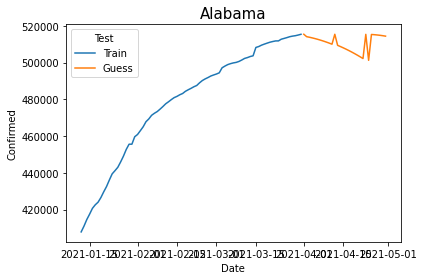

In [349]:
sns.lineplot(data=Alabama,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('Alabama', fontsize=15)

Text(0.5, 1.0, 'Alabama, Deaths')

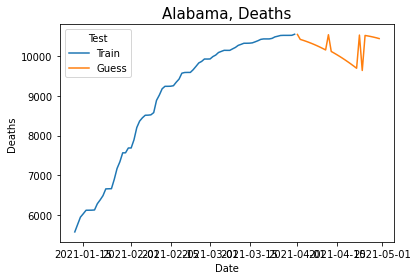

In [350]:
sns.lineplot(data=Alabama,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Alabama, Deaths', fontsize=15)

Text(0.5, 1.0, 'Alaska, Confirmed')

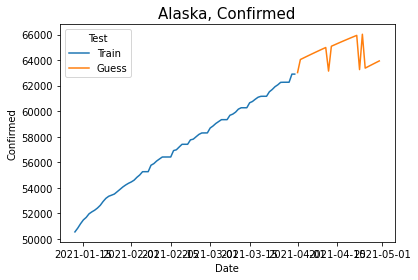

In [351]:
sns.lineplot(data=Alaska,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('Alaska, Confirmed', fontsize=15)

Text(0.5, 1.0, 'Alaska, Deaths')

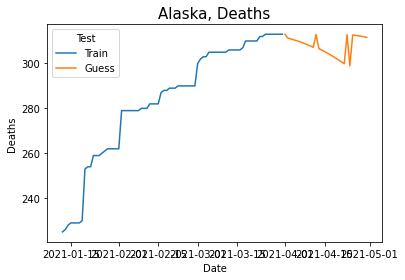

In [353]:
sns.lineplot(data=Alaska,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Alaska, Deaths', fontsize=15)

Text(0.5, 1.0, 'Arizona, Confirmed')

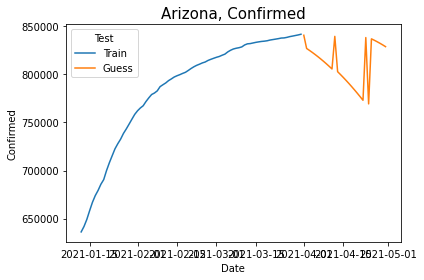

In [355]:
sns.lineplot(data=Arizona,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('Arizona, Confirmed', fontsize=15)

Text(0.5, 1.0, 'Arizona, Deaths')

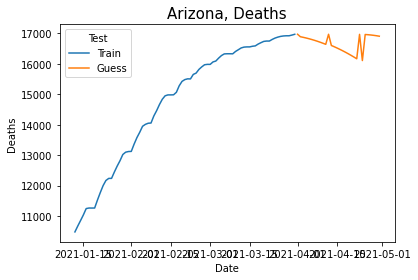

In [356]:
sns.lineplot(data=Arizona,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Arizona, Deaths', fontsize=15)

Text(0.5, 1.0, 'Arkansas, Confirmed')

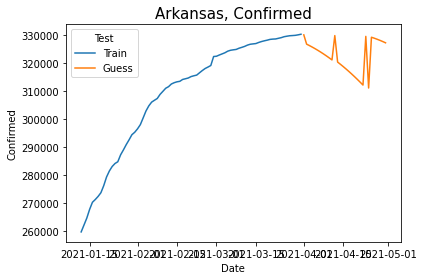

In [364]:
sns.lineplot(data=Arkansas,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('Arkansas, Confirmed', fontsize=15)

Text(0.5, 1.0, 'Arkansas, Deaths')

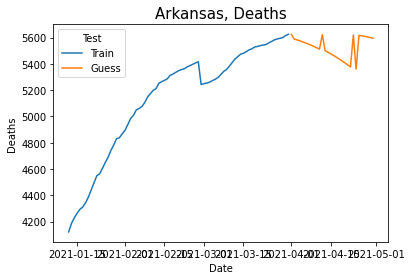

In [366]:
sns.lineplot(data=Arkansas,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Arkansas, Deaths', fontsize=15)

Text(0.5, 1.0, 'Arizona, Deaths')

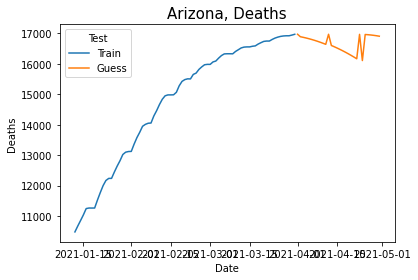

In [359]:
sns.lineplot(data=Arizona,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Arizona, Deaths', fontsize=15)

Text(0.5, 1.0, 'California, Confirmed')

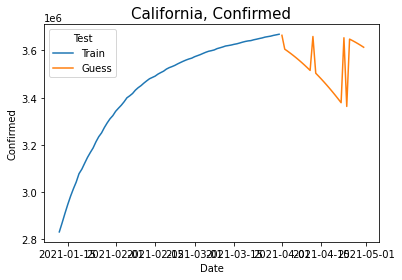

In [367]:
sns.lineplot(data=California,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('California, Confirmed', fontsize=15)

Exhibiting really weird patterns.

Text(0.5, 1.0, 'California, Deaths')

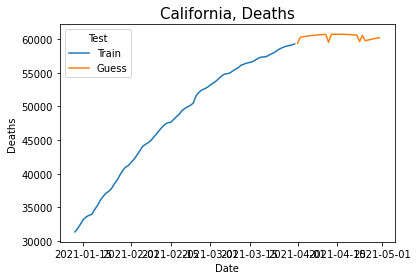

In [368]:
sns.lineplot(data=California,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('California, Deaths', fontsize
          =15)

Text(0.5, 1.0, 'Georgia, Confirmed')

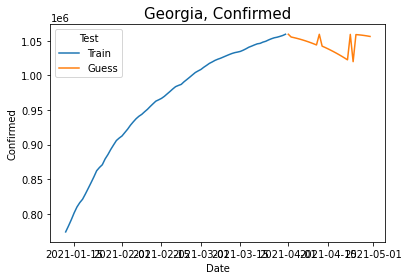

In [369]:
sns.lineplot(data=Georgia,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('Georgia, Confirmed', fontsize=15)

Text(0.5, 1.0, 'Georgia, Deaths')

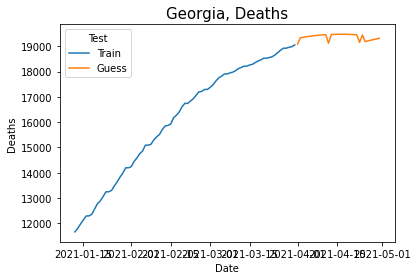

In [370]:
sns.lineplot(data=Georgia,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Georgia, Deaths', fontsize=15)

You can create the graph for a given state by following the examples above.

This shows the death estimates are fairly accurate, but there are weird spikes with every estimate. I'm also confused why the training data was affected, that shouldn't have happened.

Not a good choice for model choice.